# Stanton Murillo Transport Validation

[1] "Ionic transport in high-energy-density matter"  [10.1103/PhysRevE.93.043203](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.043203)

[2]"Efficient model for electronic transport in high energy-density matter "  [https://doi.org/10.1063/5.0048162](https://doi.org/10.1063/5.0048162)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

import SMT.core.transport as SMT
from SMT.core.physical_constants import *
from SMT.core.physical_parameters import rs_from_n

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['ytick.major.size']=5
plt.rcParams['ytick.minor.size']=3
plt.rcParams['xtick.major.size']=5
plt.rcParams['xtick.minor.size']=3
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['text.usetex'] = True

In [64]:
N_ions = 1
Z, A = 13, 26.98
mi_array_AU = np.array([amu_to_AU*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
# ρi_gpercc  = 1
ni_array_cc = np.array([6.02660153e+22])#np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
smt     = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU, improved_xc_SMT=False, improved_λdB_SMT=False, improved_ae_SMT=False, improved_PauliBlocking=False, λdB_n = 2)
print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={smt.Zbar_array[0]:0.3e}, λeff = {smt.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {smt.g_matrix} ")
print(f"K_11(gij) = {smt.K_11_matrix}")
print(f"K_12(gij) = {smt.K_12_matrix}")
print(f"K_22(gij) = {smt.K_22_matrix}")
print(f"K_13(gij) = {smt.K_13_matrix}")
print(f"Dij = {smt.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {smt.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {smt.κii[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")


For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 4.829e-09 [cm]
[[gee, gei],[gie,gii]] = [[ 29.82189249  74.43998336]
 [ 74.43998336 185.81353031]] 
K_11(gij) = [[0.0026703  0.00071444]
 [0.00071444 0.00017552]]
K_12(gij) = [[0.00623664 0.00175556]
 [0.00175556 0.00044646]]
K_22(gij) = [[0.00702937 0.00185186]
 [0.00185186 0.00044746]]
K_13(gij) = [[0.02059276 0.00603612]
 [0.00603612 0.00157653]]
Dij = [[0.38028577 0.16130628]
 [0.16130628 0.00067197]] [cm^2/s]
σ = 1.359e+04 [S/cm]
κ = 4.792e+04 [erg/cm/s/K]


FROM LUKE:

For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 3.353e-02 [cm]
gii = [185.81354848] 
K_11(gii) = [0.00017552]
K_12(gii) = [0.00044746]
K_22(gii) = [0.00044746]
K_13(gii) = [0.00157653]
Dij = 2.349e-03 [cm^2/s]
κ = 4.792e+04 [erg/cm/s/K]

In [72]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([amu_to_AU*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 1
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU, improved_xc_SMT=False, improved_λdB_SMT=False, improved_ae_SMT=False, improved_PauliBlocking=False, λdB_n = 2)
smt_mod = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU, improved_xc_SMT=False, improved_λdB_SMT=True, improved_ae_SMT=False, improved_PauliBlocking=False, λdB_n = 2)


print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={smt.Zbar_array[0]:0.3e}, λeff = {smt.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {smt.g_matrix} ")
print(f"K_11(gij) = {smt.K_11_matrix}")
print(f"K_12(gij) = {smt.K_12_matrix}")
print(f"K_22(gij) = {smt.K_22_matrix}")
print(f"K_13(gij) = {smt.K_13_matrix}")
print(f"Dij = {smt.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {smt.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {smt.κii[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")

For Z=1, A=1, T=1.000e+00 [eV], n = 6.022e+23 [1/cc]: 
Zbar=6.913e-01, λeff = 3.696e-09 [cm]
[[gee, gei],[gie,gii]] = [[38.95717158 26.93103911]
 [26.93103911 18.61739029]] 
K_11(gij) = [[0.00183531 0.00307358]
 [0.00307358 0.00505343]]
K_12(gij) = [[0.00436038 0.00712755]
 [0.00712755 0.01138374]]
K_22(gij) = [[0.00481176 0.00810221]
 [0.00810221 0.01337646]]
K_13(gij) = [[0.01458994 0.02341045]
 [0.02341045 0.03667662]]
Dij = [[0.11445963 0.10115577]
 [0.10115577 0.00426318]] [cm^2/s]
σ = 1.141e+04 [S/cm]
κ = 1.416e+06 [erg/cm/s/K]


In [73]:
# T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# # T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
# σ_list_cgs = np.ones_like(T_AU_list)
# κ_list_cgs = np.ones_like(T_AU_list)
# D_list_cgs = np.ones_like(T_AU_list)
# for i, T_AU in enumerate(T_AU_list): 
#     smt.T_array = np.array([T_AU, T_AU])
#     σ_list_cgs[i] = smt.σ * AU_to_Siemens/AU_to_cm
#     κ_list_cgs[i] = smt.κii[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
#     D_list_cgs[i] = smt.Dij[1,1] *AU_to_cm**2/AU_to_s
#     # print(25*smt.K_11_matrix[0,1:] - 20*smt.K_12_matrix[0,1:] + 4*smt.K_13_matrix[0,1:]," = ", 25*smt.K_11_matrix[0,1:], - 20*smt.K_12_matrix[0,1:], 4*smt.K_13_matrix[0,1:])
#     print(f"g: {smt.g_matrix}")
#     print("denom: ", 25*smt.K_11_matrix - 20*smt.K_12_matrix + 4*smt.K_13_matrix, '\n')#," = \n", 25*smt.K_11_matrix, - 20*smt.K_12_matrix, 4*smt.K_13_matrix)


## $K_{nm}$

In [74]:
K11_data = read_csv("K_11(g).txt", delim_whitespace=True, header=1)

(array(0.21901579), array(0.12091229))

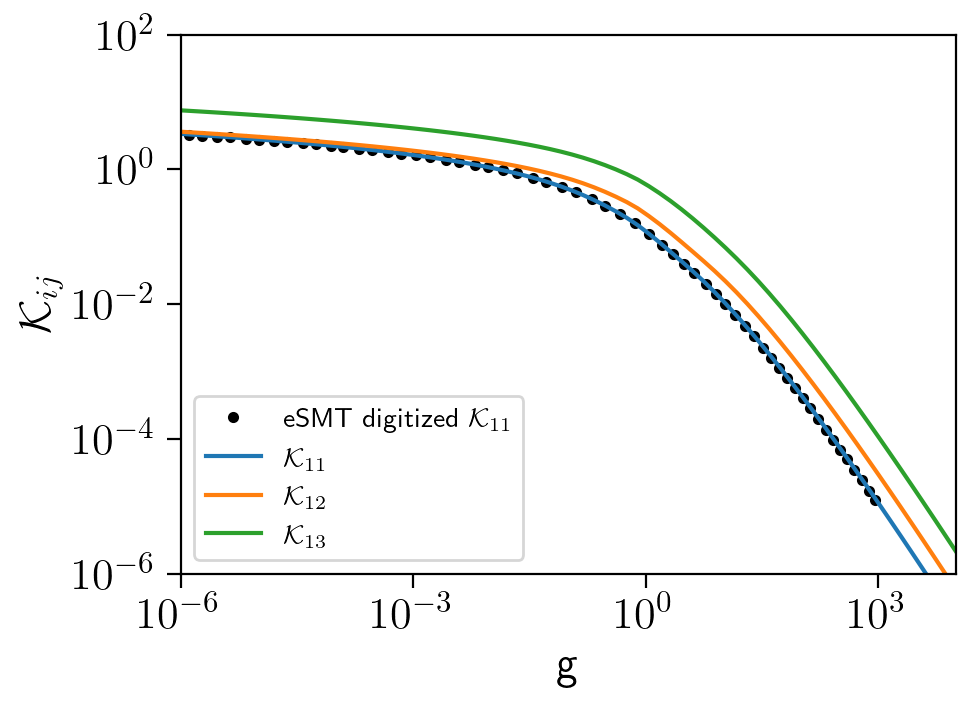

In [75]:
from SMT.core.transport import K_nm

fig, ax = plt.subplots( facecolor='white')

#Plot iSMT digitized
ax.plot(K11_data['g'], K11_data['K_11(g)'],'k.', label=r"eSMT digitized  $\mathcal{K}_{11}$")
# ax.plot(K11_data['g'], 0.5/K11_data['g']**2,'k.', label="Digitized")

#
g_array = np.geomspace(1e-10,1e4,num=100)
ax.plot(g_array,[K_nm(g,1,1) for g in g_array], label=" $\mathcal{K}_{11}$")
ax.plot(g_array,[K_nm(g,1,2) for g in g_array], label=" $\mathcal{K}_{12}$")
ax.plot(g_array,[K_nm(g,1,3) for g in g_array], label=" $\mathcal{K}_{13}$")

ax.set_xlabel(r"g ", fontsize=16)
ax.set_ylabel(r"$\mathcal{K}_{ij}$", fontsize=16)

# Inset Text Box
# bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-6,1e2)
ax.set_xlim(1e-6,1e4)
# Legend
ax.legend()

K_nm(1,1,2), K_nm(1,1,1) 


## Electrical Conductivity

First, loading data from [2]

In [76]:
σ_data_e1b = read_csv("Fig1b_eSMT_σ.txt", delim_whitespace=True, header=1)
σ_data_GPZbar = read_csv("H_σe_GP_Zbar.txt", delim_whitespace=True, header=0)
MLM_data = read_csv("MM_MLM_σe_H1.txt", delim_whitespace=True, header=1)
TTCW1_Hansen_Muzek_data = read_csv("H_2i_Hansen_Muze-k.txt", delim_whitespace=True, header=1)
TTCW1_Sjostrom_data = read_csv("H_2i_Sjostrom_SDMD.txt", delim_whitespace=True, header=1)
TTCW1_Clerouin_PIJ_data = read_csv("H_2i_Clerouin_PIJ.txt", delim_whitespace=True, header=1)


In [87]:
T_AU_list = np.geomspace(1e-2,3e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
σ_list_cgs_mod = np.ones_like(T_AU_list)
κe_list_cgs = np.ones_like(T_AU_list)
κe_list_cgs_mod = np.ones_like(T_AU_list)
κe_no_ee_list_cgs = np.ones_like(T_AU_list)
κi_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    smt.T_array = np.array([T_AU, T_AU])
    smt_mod.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = smt.σ * AU_to_Siemens/AU_to_cm
    σ_list_cgs_mod[i] = smt_mod.σ * AU_to_Siemens/AU_to_cm
    
    κi_list_cgs[i] = smt.κii[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    κe_list_cgs[i] = smt.κe[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    κe_list_cgs_mod[i] = smt_mod.κe[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    κe_no_ee_list_cgs[i] = smt.κe_no_ee[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    
    D_list_cgs[i] = smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*smt.K_11_matrix[0,1:] - 20*smt.K_12_matrix[0,1:] + 4*smt.K_13_matrix[0,1:]," = ", 25*smt.K_11_matrix[0,1:], - 20*smt.K_12_matrix[0,1:], 4*smt.K_13_matrix[0,1:])
    # print(f"g: {smt.g_matrix}")
    # print("denom: ", 25*smt.K_11_matrix - 20*smt.K_12_matrix + 4*smt.K_13_matrix, '\n')#," = \n", 25*smt.K_11_matrix, - 20*smt.K_12_matrix, 4*smt.K_13_matrix)


/home/zach/plasma/SMT/core/physical_parameters.py:126: RuntimeWarning: overflow encountered in cosh
  sech = lambda x: 1/np.cosh(x)


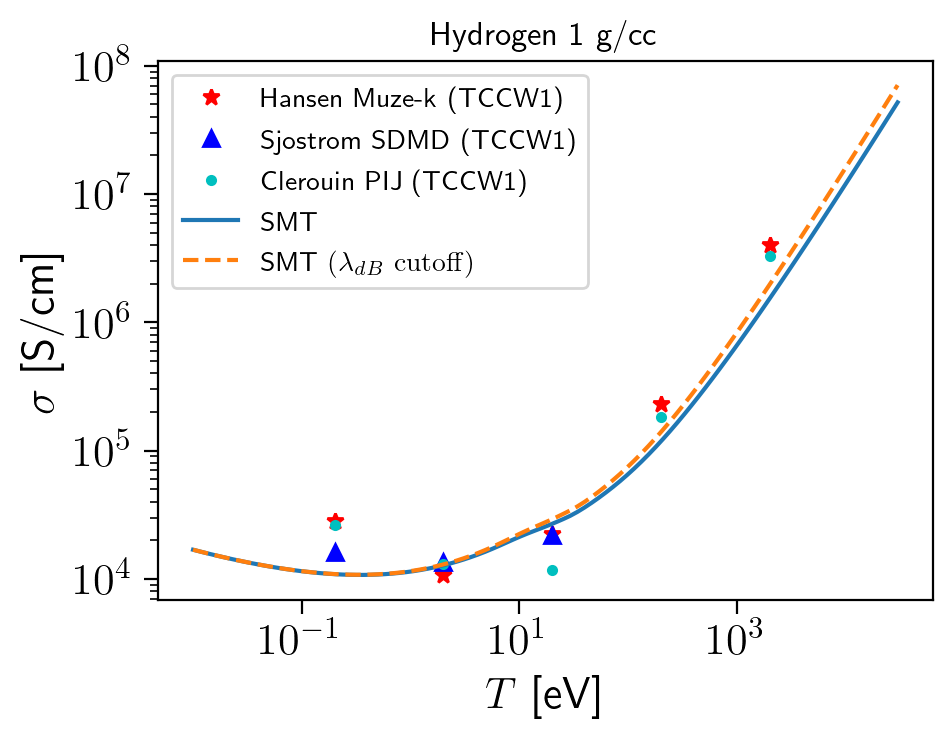

In [96]:
fig, ax = plt.subplots( facecolor='white')

colors=['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851']


# Plot digitized eSMT data
# ax.plot(σ_data_e1b['T[eV]'], σ_data_e1b['σ[S/cm]'],'k-', label="eSMT digitized")

# ax.plot(σ_data_GPZbar['T[eV]'], σ_data_GPZbar['σe[S/cm](SMT)'],color=colors[0], label="SMT GP Zbar")
# ax.plot(σ_data_GPZbar['T[eV]'], σ_data_GPZbar['σe[S/cm](modSMT)'],color=colors[0],linestyle='--', label="mod SMT GP Zbar")
# ax.plot(MLM_data['T[eV]'], MLM_data['σe[S/cm]'], label="MLM")
ax.plot(TTCW1_Hansen_Muzek_data['T[eV]'], TTCW1_Hansen_Muzek_data['σ[S/cm]'],'r*', label="Hansen Muze-k (TCCW1)")
ax.plot(TTCW1_Sjostrom_data['T[eV]'], TTCW1_Sjostrom_data['σ[S/cm]'],'b^', label="Sjostrom SDMD (TCCW1)")
ax.plot(TTCW1_Clerouin_PIJ_data['T[eV]'], TTCW1_Clerouin_PIJ_data['σ[S/cm]'],'c.', label="Clerouin PIJ (TCCW1)")

#
ax.plot(T_AU_list*AU_to_eV, σ_list_cgs, label='SMT')
ax.plot(T_AU_list*AU_to_eV, σ_list_cgs_mod,'--', label=r'SMT $(\lambda_{dB}\ \rm{cutoff})$')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"$\sigma$ [S/cm]")
ax.set_title("Hydrogen 1 g/cc")
# Legend
ax.legend()



## Thermal Conductivity

#### SMT

In [88]:
κ_data_e3b = read_csv("Fig3b_eSMT_κ.txt", delim_whitespace=True, header=1)
κ_data_GPZbar = read_csv("H_κe_GP_Zbar.txt", delim_whitespace=True, header=0)
MLM_data = read_csv("MM_MLM_κe_H1.txt", delim_whitespace=True, header=1)
TTCW1_Hansen_Muzek_data = read_csv("H_2i_Hansen_Muze-k.txt", delim_whitespace=True, header=1)
TTCW1_Sjostrom_data = read_csv("H_2i_Sjostrom_SDMD.txt", delim_whitespace=True, header=1)
TTCW1_Clerouin_PIJ_data = read_csv("H_2i_Clerouin_PIJ.txt", delim_whitespace=True, header=1)
TTCW2_Hansen_data   = read_csv("Fig7tl_TCCW2_κ_AA.txt", delim_whitespace=True, header=1)
GP_Ziman_data = read_csv("H_GP_Ziman.dat", delim_whitespace=True, header=0)

In [89]:
# np.savetxt('MM_MLM_κe_H1.txt', MLM_data.T, header='#Michael Murillo MLM data, Jan 30, 2024\nT[eV] \t\t\t  κe[W/cm-KeV]',comments='')

In [90]:
κe_no_ee_list_cgs/κe_list_cgs

array([1.49700273, 1.49980233, 1.50271107, 1.50573705, 1.50888932,
       1.51217796, 1.51561422, 1.5192107 , 1.52298147, 1.52694222,
       1.53111047, 1.53550575, 1.54014973, 1.54506645, 1.55028241,
       1.55582671, 1.56173108, 1.56802976, 1.5747593 , 1.58195806,
       1.58966534, 1.59792002, 1.60675848, 1.61621148, 1.62629966,
       1.63702714, 1.64837266, 1.66027761, 1.67263044, 1.68524731,
       1.69784997, 1.71004381, 1.72130261, 1.73097134, 1.7383044 ,
       1.74255888, 1.74315762, 1.73991537, 1.73328475, 1.72453923,
       1.71579477, 1.70979902, 1.70946881, 1.71718624, 1.73388172,
       1.75812777, 1.78604219, 1.81297082, 1.8360994 , 1.85531575,
       1.87179226, 1.88643519, 1.90224444, 1.91600914, 1.91765131,
       1.90598373, 1.88893579, 1.8706154 , 1.85167294, 1.83177614,
       1.81077767, 1.78892737, 1.76672457, 1.74472689, 1.72342253,
       1.7031745 , 1.68421392, 1.66665825, 1.65053798, 1.6358228 ,
       1.62244349, 1.61030853, 1.599316  , 1.58936157, 1.58034

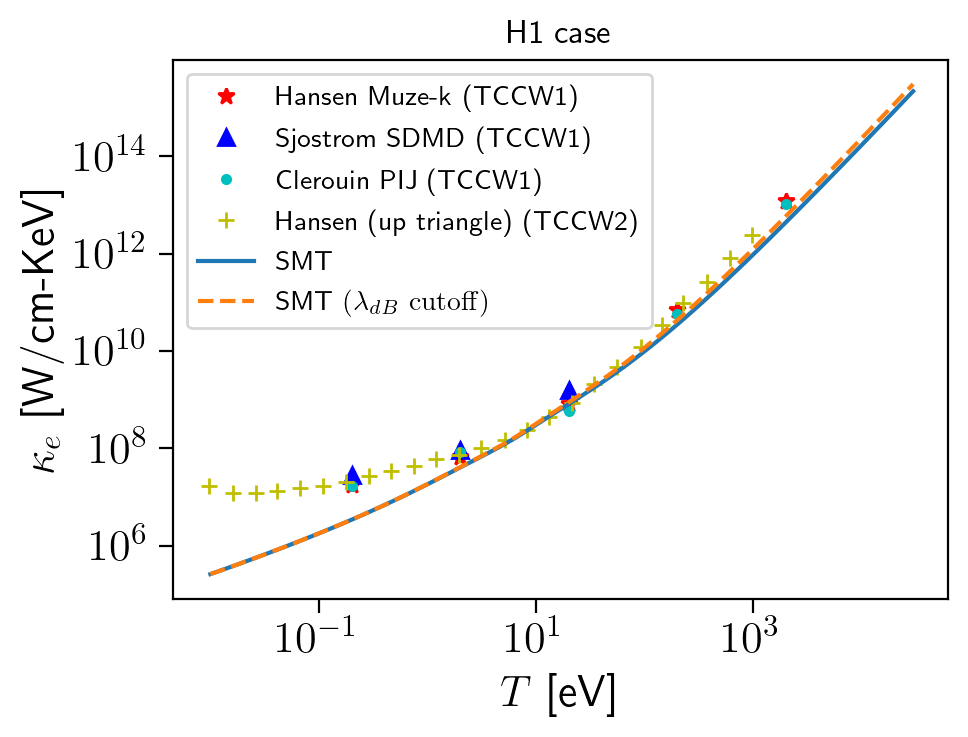

In [98]:
fig, ax = plt.subplots( facecolor='white')#, figsize=(10,8))

AU_to_ergpercmsK = AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)
AU_to_WpercmKeV  = AU_to_J/AU_to_s / (AU_to_cm*AU_to_eV/1000)
ergpercmsK_to_WpercmKeV = AU_to_WpercmKeV/AU_to_ergpercmsK

colors=['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851']


# Plot digitized eSMT data
# ax.plot(κ_data_e3b['T[eV]'], κ_data_e3b['κ[erg/cm/s/K]']*ergpercmsK_to_WpercmKeV,'k-', label="eSMT digitized")
# ax.plot(κ_data_GPZbar['T[eV]'], κ_data_GPZbar['κe[W/(keVcm)](SMT)'],color=colors[0], label="SMT (GP Zbar)")
# ax.plot(κ_data_GPZbar['T[eV]'], κ_data_GPZbar['κe[W/(keVcm)](modSMT)'],color=colors[0],linestyle='--', label="mod SMT (GP Zbar)")
# ax.plot(MLM_data['T[eV]'], MLM_data['κe[W/cm-KeV]'], label="MLM")
ax.plot(TTCW1_Hansen_Muzek_data['T[eV]'], TTCW1_Hansen_Muzek_data['κe[erg/s/cm/K]']*ergpercmsK_to_WpercmKeV,'r*', label="Hansen Muze-k (TCCW1)")
ax.plot(TTCW1_Sjostrom_data['T[eV]'], TTCW1_Sjostrom_data['κe[erg/s/cm/K]']*ergpercmsK_to_WpercmKeV,'b^', label="Sjostrom SDMD (TCCW1)")
ax.plot(TTCW1_Clerouin_PIJ_data['T[eV]'], TTCW1_Clerouin_PIJ_data['κe[erg/s/cm/K]']*ergpercmsK_to_WpercmKeV,'c.', label="Clerouin PIJ (TCCW1)")
ax.plot(TTCW2_Hansen_data['T[eV]'], TTCW2_Hansen_data['κe[erg/cm/s/K]']*ergpercmsK_to_WpercmKeV,'y+', label="Hansen (up triangle) (TCCW2)")
# ax.plot(GP_Ziman_data['Te(eV)'], GP_Ziman_data['k_th']*AU_to_ergpercmsK*ergpercmsK_to_WpercmKeV,'k.', label="GP Ziman ")

ax.plot(T_AU_list*AU_to_eV, κe_list_cgs*ergpercmsK_to_WpercmKeV, label='SMT')
ax.plot(T_AU_list*AU_to_eV, κe_list_cgs_mod*ergpercmsK_to_WpercmKeV,'--', label=r'SMT $(\lambda_{dB}\ \rm{cutoff})$')

# ax.plot(T_AU_list*AU_to_eV, κe_no_ee_list_cgs*ergpercmsK_to_WpercmKeV, 'r--',label='SMT (no ee)')

ax.set_ylabel(r"$\kappa_e$ [W/cm-KeV]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("H1 case")

# Legend
ax.legend()


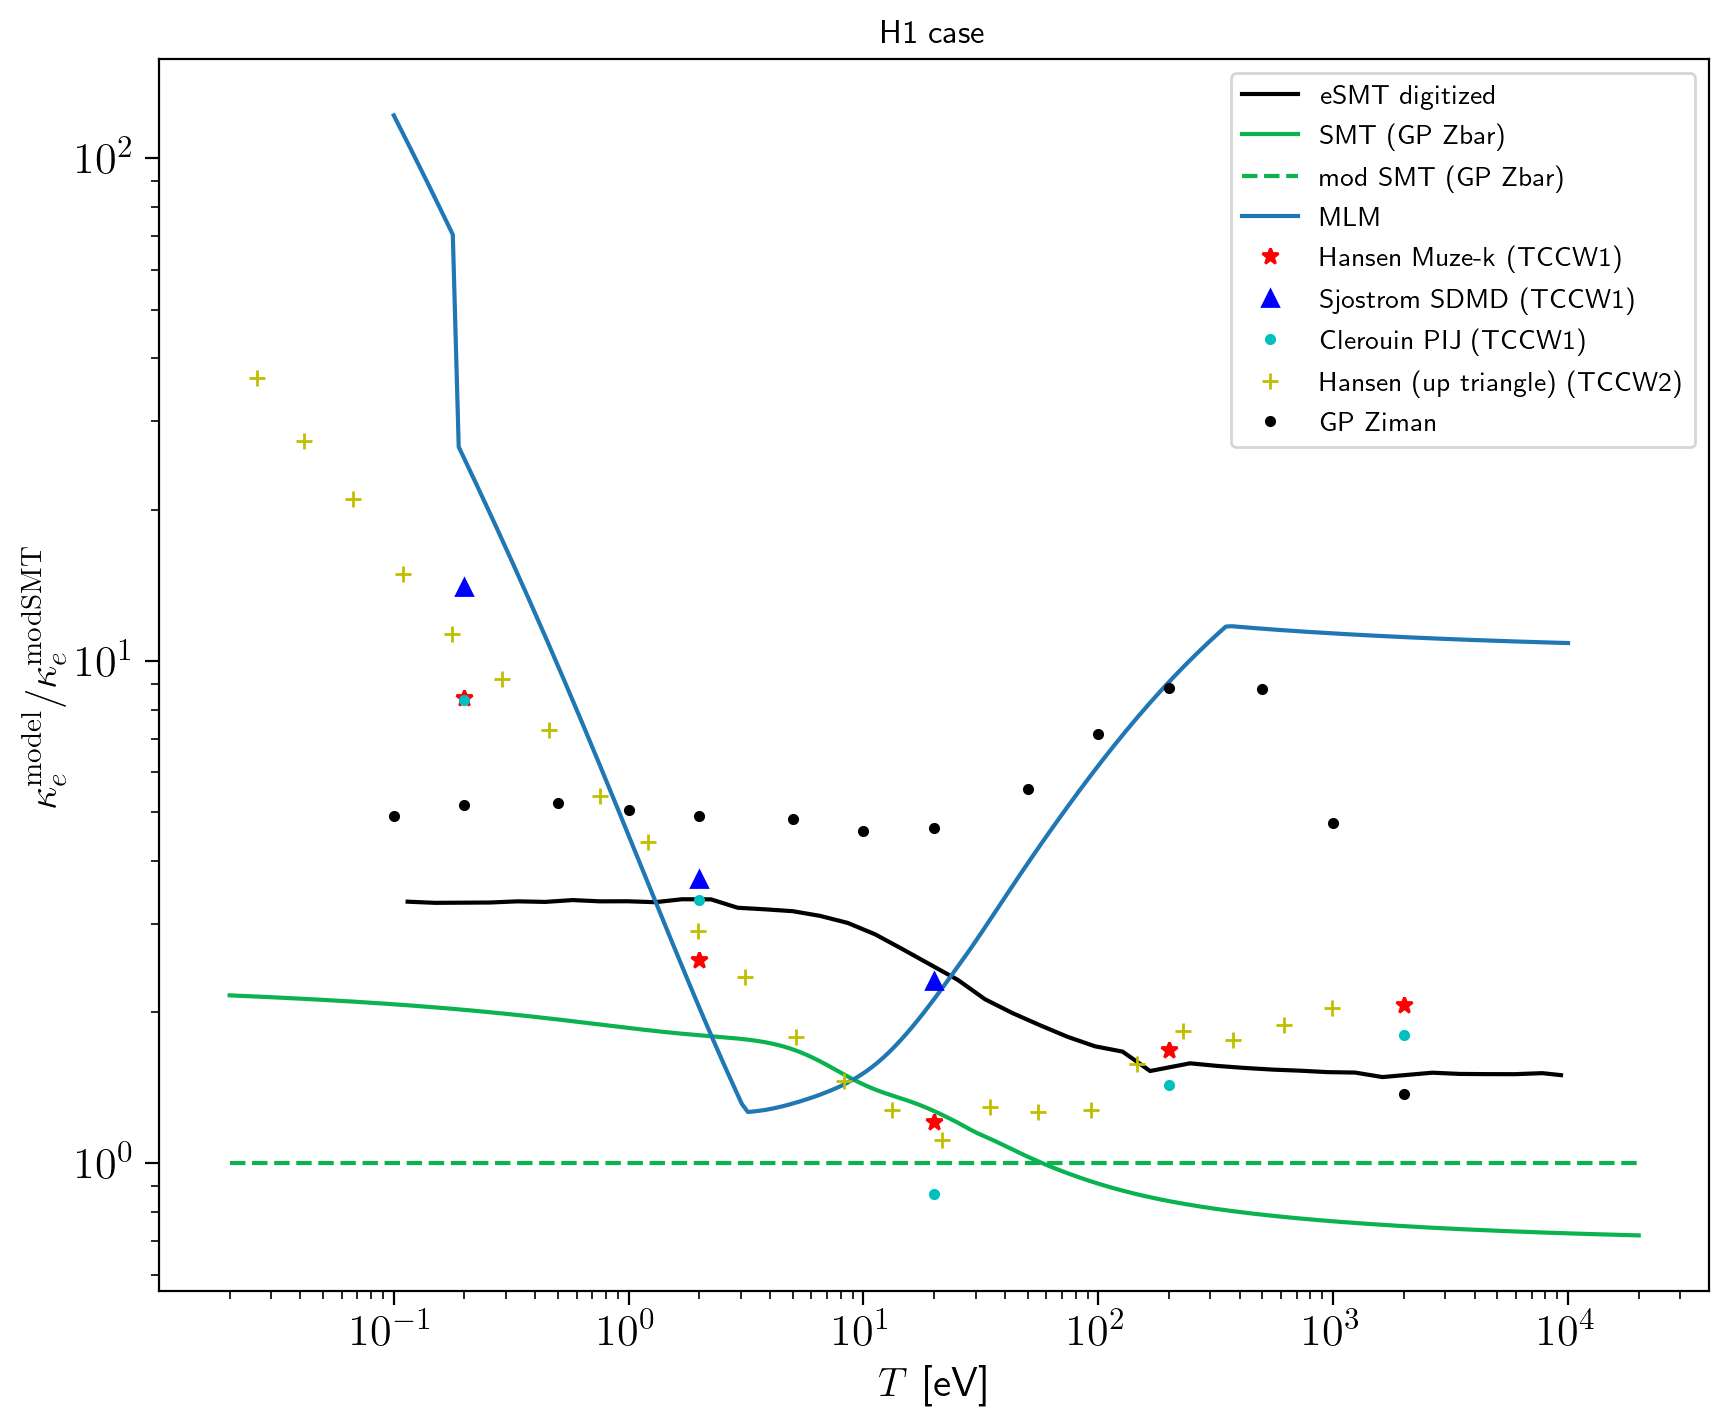

In [85]:
from scipy.interpolate import interp1d
SMT_func = lambda T_eV: interp1d(κ_data_GPZbar['T[eV]'], κ_data_GPZbar['κe[W/(keVcm)](modSMT)'], bounds_error=False, fill_value=np.nan)(T_eV)

fig, ax = plt.subplots( facecolor='white', figsize=(10,8))

AU_to_ergpercmsK = AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)
AU_to_WpercmKeV  = AU_to_J/AU_to_s / (AU_to_cm*AU_to_eV/1000)
ergpercmsK_to_WpercmKeV = AU_to_WpercmKeV/AU_to_ergpercmsK

colors=['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851']


# Plot digitized eSMT data
ax.plot(κ_data_e3b['T[eV]'], κ_data_e3b['κ[erg/cm/s/K]']*ergpercmsK_to_WpercmKeV/SMT_func(κ_data_e3b['T[eV]']),'k-', label="eSMT digitized")
ax.plot(κ_data_GPZbar['T[eV]'], κ_data_GPZbar['κe[W/(keVcm)](SMT)']/SMT_func(κ_data_GPZbar['T[eV]']), label="SMT (GP Zbar)",color=colors[0])
ax.plot(κ_data_GPZbar['T[eV]'], κ_data_GPZbar['κe[W/(keVcm)](modSMT)']/SMT_func(κ_data_GPZbar['T[eV]']),color=colors[0],linestyle='--', label="mod SMT (GP Zbar)")
ax.plot(MLM_data['T[eV]'], MLM_data['κe[W/cm-KeV]']/SMT_func(MLM_data['T[eV]']), label="MLM")
ax.plot(TTCW1_Hansen_Muzek_data['T[eV]'], TTCW1_Hansen_Muzek_data['κe[erg/s/cm/K]']*ergpercmsK_to_WpercmKeV/SMT_func(TTCW1_Hansen_Muzek_data['T[eV]']),'r*', label="Hansen Muze-k (TCCW1)")
ax.plot(TTCW1_Sjostrom_data['T[eV]'], TTCW1_Sjostrom_data['κe[erg/s/cm/K]']*ergpercmsK_to_WpercmKeV/SMT_func(TTCW1_Sjostrom_data['T[eV]']),'b^', label="Sjostrom SDMD (TCCW1)")
ax.plot(TTCW1_Clerouin_PIJ_data['T[eV]'], TTCW1_Clerouin_PIJ_data['κe[erg/s/cm/K]']*ergpercmsK_to_WpercmKeV/SMT_func(TTCW1_Clerouin_PIJ_data['T[eV]']),'c.', label="Clerouin PIJ (TCCW1)")
ax.plot(TTCW2_Hansen_data['T[eV]'], TTCW2_Hansen_data['κe[erg/cm/s/K]']*ergpercmsK_to_WpercmKeV/SMT_func(TTCW2_Hansen_data['T[eV]']),'y+', label="Hansen (up triangle) (TCCW2)")
ax.plot(GP_Ziman_data['Te(eV)'], GP_Ziman_data['k_th']*AU_to_ergpercmsK*ergpercmsK_to_WpercmKeV/SMT_func(GP_Ziman_data['Te(eV)']),'k.', label="GP Ziman ")

# ax.plot(T_AU_list*AU_to_eV, κe_list_cgs*ergpercmsK_to_WpercmKeV, label='SMT')
# ax.plot(T_AU_list*AU_to_eV, κe_no_ee_list_cgs*ergpercmsK_to_WpercmKeV, 'r--',label='SMT (no ee)')

ax.set_ylabel(r"$\kappa_e^{\rm model}/\kappa_e^{\rm mod SMT}$", fontsize=15)
ax.set_xlabel(r"$T$ [eV]", fontsize=15)

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("H1 case")

# Legend
ax.legend()



In [ ]:
25*smt.K_11_matrix[1:,1], - 20*smt.K_12_matrix[1:,1], 4*smt.K_13_matrix[1:,1]

#### TCCW2

In [ ]:
N_ions = 1
Z, A = 6, 12
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 10
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
tccw2_κ_smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

T_AU_list = np.geomspace(1e-2,2e3,num=50)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κe_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
g_ee_list = np.ones_like(T_AU_list)
λi_list = np.ones_like(T_AU_list)
λe_list = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    tccw2_κ_smt.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = tccw2_κ_smt.σ * AU_to_Siemens/AU_to_cm
    κe_list_cgs[i] = tccw2_κ_smt.κee * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = tccw2_κ_smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    g_ee_list[i] = tccw2_κ_smt.g_matrix[0,0]
    λi_list[i]   = tccw2_κ_smt.λi_array[0]
    λe_list[i]   = tccw2_κ_smt.λe

In [ ]:
κe_data_tccw2_κ = read_csv("Fig7tm_TCCW2_κ.txt", delim_whitespace=True, header=1)
κe_data_tccw2_κ_AA = read_csv("Fig7tm_TCCW2_κ_AA.txt", delim_whitespace=True, header=1)

In [ ]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κe_data_tccw2_κ['T[eV]'], κe_data_tccw2_κ['κ[erg/cm/s/K]'],'k.', label="TCCW2 digitized SMT")
ax.plot(κe_data_tccw2_κ_AA['T[eV]'], κe_data_tccw2_κ_AA['κ[erg/cm/s/K]'],'b^', label="TCCW2 data - AA")

#
ax.plot(T_AU_list*AU_to_eV, κe_list_cgs, label='my SMT (with g_ee)')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e5,1e13)
ax.set_xlim(0.5e-1,1e3)

# Legend
ax.legend()


In [ ]:
25*smt.K_11_matrix[1:,1], - 20*smt.K_12_matrix[1:,1], 4*smt.K_13_matrix[1:,1]

## Diffusion

In [ ]:
fig, ax = plt.subplots( facecolor='white')

ax.plot(T_AU_list*AU_to_eV, D_list_cgs, label='')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r"D [cm$^2$/s]", fontsize=16)
ax.set_xlabel(r"$T$ [eV]", fontsize=16)

# Legend
ax.legend()


## Temperature Relaxation
In reference [1], they actually use
$$\tau_{MD} = 2/(\tau_{ei}^{-1} + \tau_{ie}^{-1}) $$
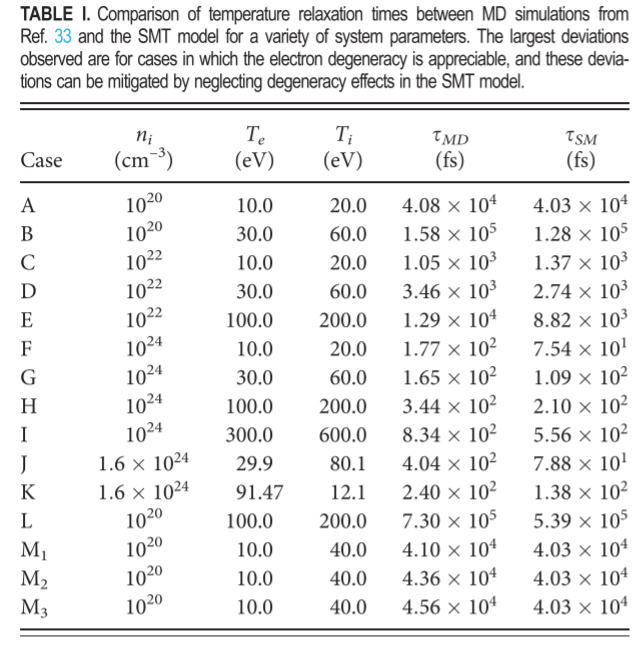


In [ ]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])


In [ ]:
# Case A
T_array_AU = np.array([10*eV_to_AU, 20*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( smt.τij[0,1]**-1 + smt.τij[1,0]**-1)  *AU_to_s*1e15))

In [ ]:
# Case B
T_array_AU = np.array([30*eV_to_AU, 60*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( smt.τij[0,1]**-1 + smt.τij[1,0]**-1)  *AU_to_s*1e15))

In [ ]:
# Γ_melt = lambda κ: 171.8 + 82.8*(np.exp(0.565*κ**1.38) - 1) 

# Actual YVM formula
η_YVM_func = lambda Γ, κ: np.exp(-0.2*κ**1.62)*(0.0051*Γ_melt(κ)/Γ + 0.374*Γ/Γ_melt(κ) + 0.022)
# η_YVM_array = 
@np.vectorize

def η_IYVM_func(Γ,κ):
    A = 1.45e-4 - 1.04e-4*κ + 3.69e-5*κ**2
    B = 0.3 + 0.86*κ-0.69*κ**2 + 0.138*κ**3
    C = 0.015 + 0.048*κ*0.754
    a = 1.78 + 0.13*κ - 0.062*κ**2
    b = 1.63 - 0.325*κ + 0.24*κ**2

    # Actual IYVM formula
    return np.exp(-0.2*κ**1.62) * ( A*(Γ_melt(κ)/Γ)**a + B*(Γ/Γ_melt(κ))**b + C )

